# Studying Stellar, Quasar and Galaxy from Kaggle Dataset

### Dataset used: [Stellar Classification Dataset - SDSS17 kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

This dataset contains brightness of objects in Ultraviolet, Green, Red, Near-Infrared and Infrared filters of Photometric System.
I am trying to show a very basic observation/study about Stars, Galaxy and Quasars by using this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
import astropy.units as u
%matplotlib inline

In [2]:
data = pd.read_csv('stellar_clasification_dataset/star_classification.csv')

In [3]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.543777e+18,GALAXY,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.176014e+19,GALAXY,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.152200e+18,GALAXY,0.644195,4576.0,55592.0,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030107e+19,GALAXY,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.891865e+18,GALAXY,0.116123,6121.0,56187.0,842.0


In [4]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR', nan], dtype=object)

### Let's look at different filters.......

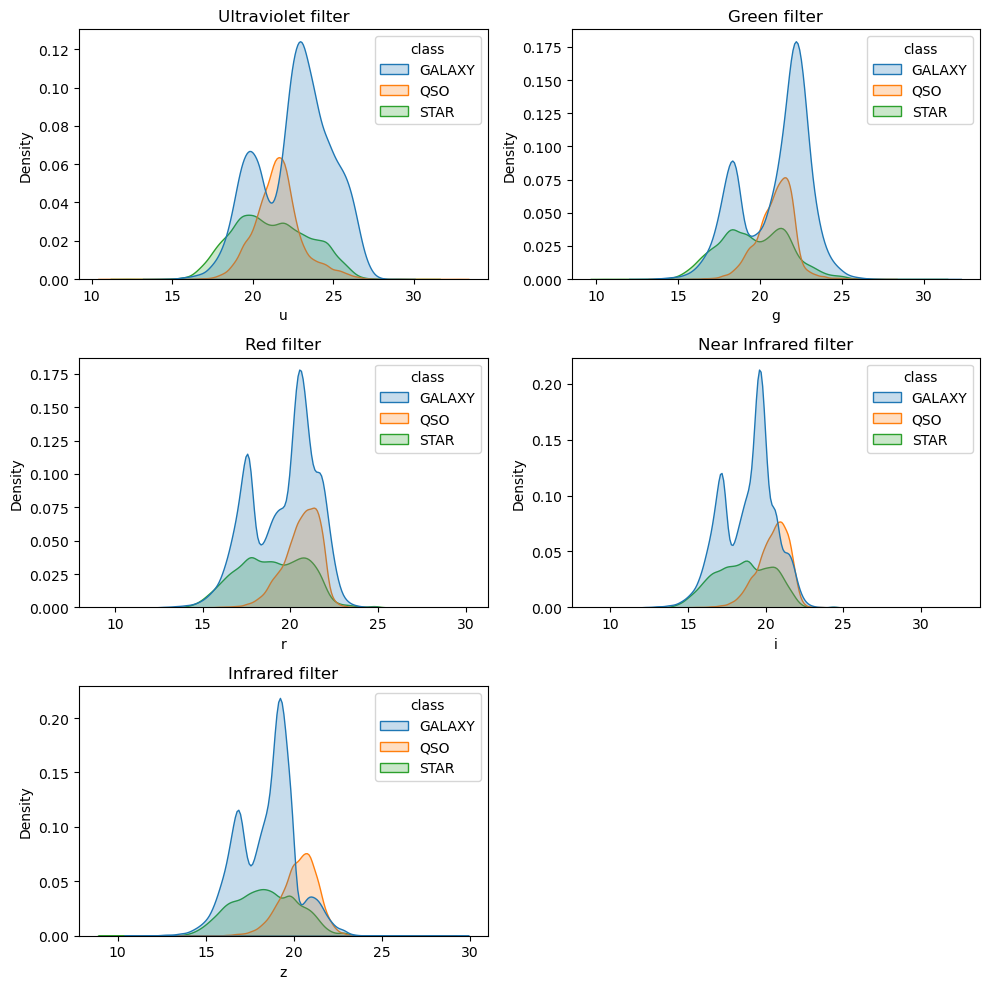

In [6]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.title("Ultraviolet filter")
sns.kdeplot(data=data, x='u', hue='class', fill=True)

plt.subplot(3,2,2)
plt.title("Green filter")
sns.kdeplot(data=data, x='g', hue='class', fill=True)

plt.subplot(3,2,3)
plt.title("Red filter")
sns.kdeplot(data=data, x='r', hue='class', fill=True)

plt.subplot(3,2,4)
plt.title("Near Infrared filter")
sns.kdeplot(data=data, x='i', hue='class', fill=True)

plt.subplot(3,2,5)
plt.title("Infrared filter")
sns.kdeplot(data=data, x='z', hue='class', fill=True)

plt.tight_layout()

Observations from different filters:
- Here we can see that major Quasars are brighter than majority of Stars and Galaxies if we observe in higher wavelenghts like Red, Near Infrared and Infrared.Brightness of Quasars increases if observed in higher wavelengths, which can also be seen in the boxplots shown below. Which is true as Quasars are the brightest object in the entire universe.

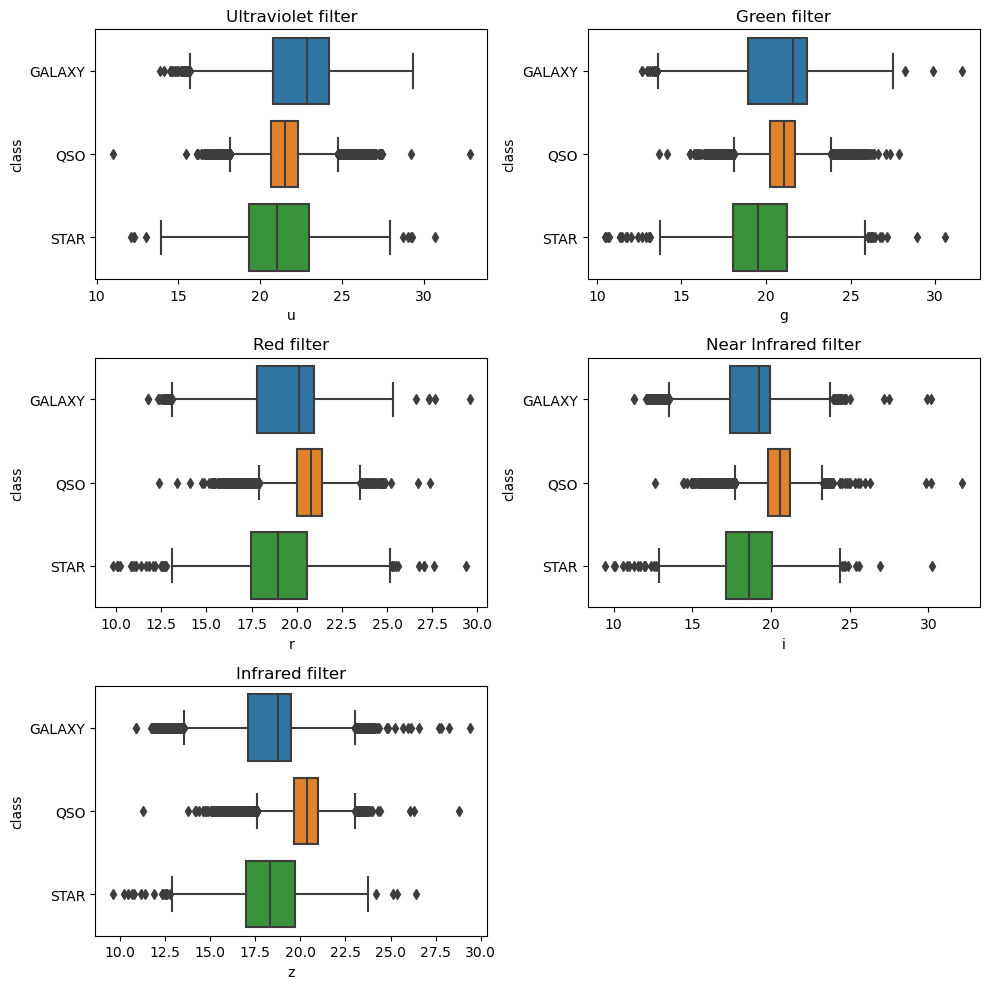

In [7]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.title("Ultraviolet filter")
sns.boxplot(data=data, x="u", y="class")

plt.subplot(3,2,2)
plt.title("Green filter")
sns.boxplot(data=data, x="g", y="class")

plt.subplot(3,2,3)
plt.title("Red filter")
sns.boxplot(data=data, x="r", y="class")

plt.subplot(3,2,4)
plt.title("Near Infrared filter")
sns.boxplot(data=data, x="i", y="class")

plt.subplot(3,2,5)
plt.title("Infrared filter")
sns.boxplot(data=data, x="z", y="class")

plt.tight_layout()

- Mean of the brightness of Quasars are increasing with the higher wavelenths.

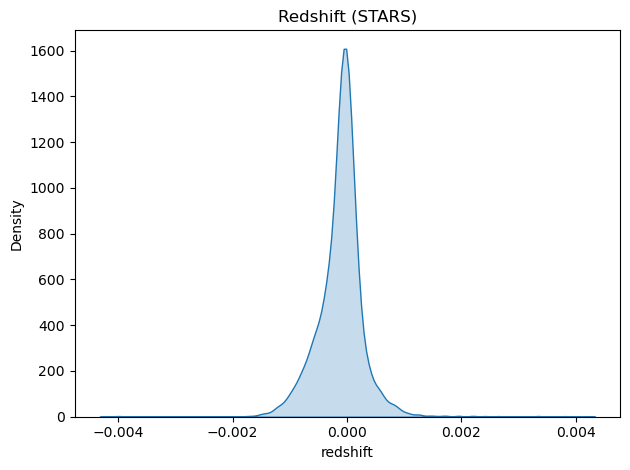

In [8]:
plt.title("Redshift (STARS)")
sns.kdeplot(data=data[data['class']=='STAR'], x='redshift', fill=True)
plt.tight_layout()

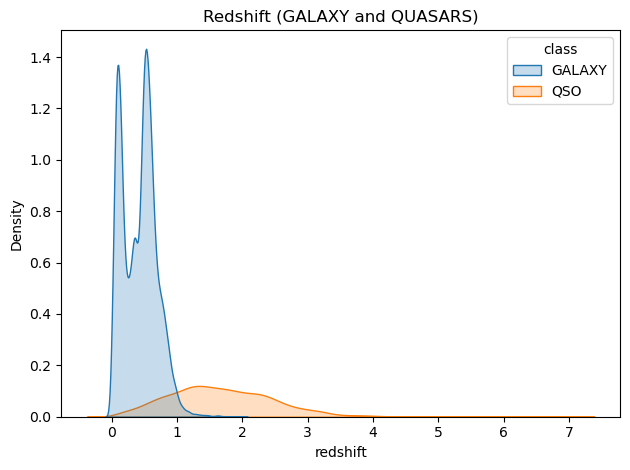

In [9]:
plt.title("Redshift (GALAXY and QUASARS)")
sns.kdeplot(data=data[data['class'].isin(['GALAXY', 'QSO'])], x='redshift', hue='class', fill=True)
plt.tight_layout()

<AxesSubplot:xlabel='alpha', ylabel='delta'>

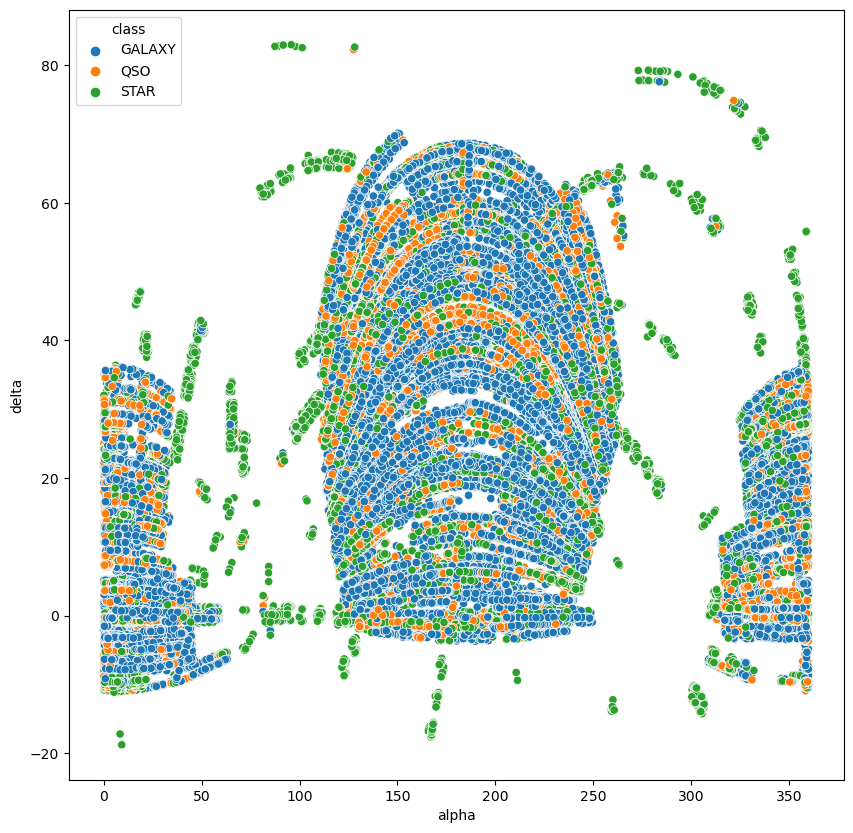

In [10]:
figure = plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x='alpha', y='delta', hue='class')

In [11]:
eq = SkyCoord(data['alpha'], data['delta'], unit=u.deg)
gal = eq.galactic
data['gal_l'] = gal.l
data['gal_b'] = gal.b

/home/jaskirat/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:3638: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


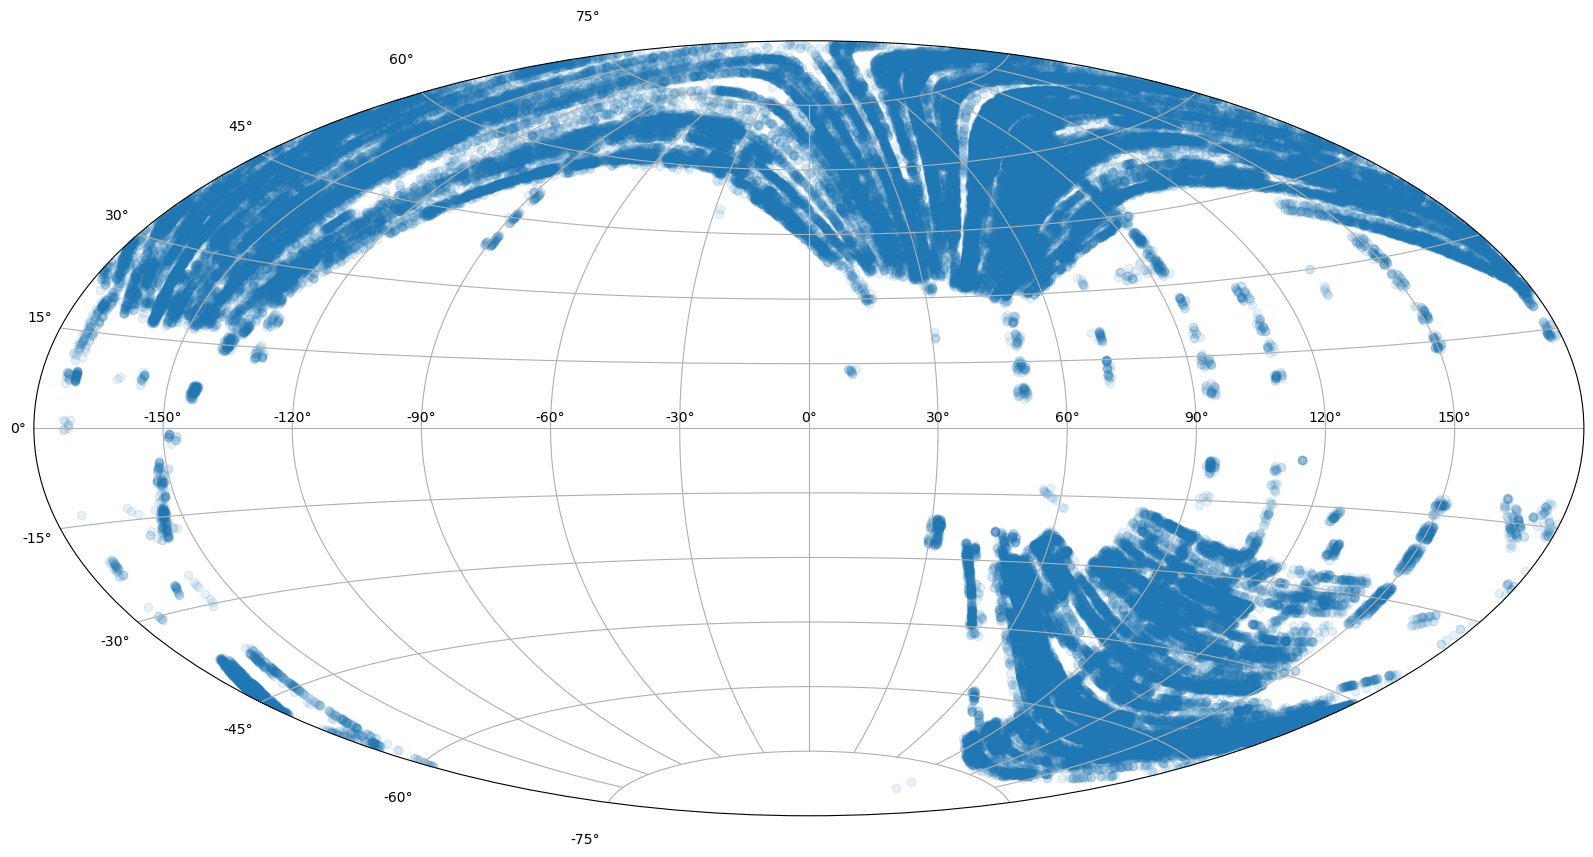

In [12]:
figure = plt.figure(figsize=(20,20))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, alpha=0.1)

<AitoffAxesSubplot:>

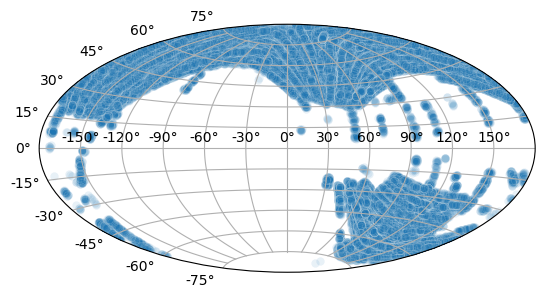

In [13]:
plt.subplot(111, projection='aitoff')
plt.grid(True)
sns.scatterplot(x=gal.l.wrap_at('180d').radian, y=gal.b.radian, alpha=0.1)